In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## TODOs
- [ ] Replace left and right with ptotic and normal 
- [ ] Adjust the similarity equation such that ptotic/normal * 100 
- $Similarity = \dfrac{Ptotic}{Normal} * 100$
- [ ] How file is read ? (My convention is right eye contour , left eye contour , right eye pupil , left eye pupil)
- [ ] GUI

In [5]:
def read_coordinates(filename,split_idx):
    coordinates = []
    with open(filename,'r') as coord_file:
        while True:
            p = coord_file.readline().strip('\n')
            if p == '':
                break
            try:
                x,y = p.split('\t')
                coordinates.append((float(x),float(y)))
            except ValueError:
                split_idx = int(p)
    left_pupil = coordinates.pop() # last coord
    right_pupil = coordinates.pop() # before last coord 
    upper_right_contour = coordinates[:split_idx]
    upper_left_contour = coordinates[split_idx:]
    return upper_right_contour,upper_left_contour, right_pupil,left_pupil
            

def choose_best_fit_degree(contour):
    x = [c[0] for c in contour]
    y = [c[1] for c in contour]
    degree = 3
    p = np.polyfit(x,y,degree)
    return x , np.poly1d(p)

def compute_similarity(right_eye_feature,left_eye_feature,ptotic):
    if ptotic == 'r':
        return round(100 * right_eye_feature / left_eye_feature,2)
    else:
        return round(100 * left_eye_feature / right_eye_feature,2)

def plot_contour(right_contour,left_contour,right_pupil,left_pupil,ptotic):
    if not plt.gca().yaxis_inverted():
        plt.gca().invert_yaxis()
    plt.scatter(right_pupil[0],right_pupil[1],c='b')
    plt.scatter(left_pupil[0],left_pupil[1],c='r')
    x_right,fx = choose_best_fit_degree(right_contour)
    print(f"Equation of the right eye : \n {fx}")
    x_right_new = np.linspace(min(x_right),max(x_right),100)
    y_right_new = fx(x_right_new)
    plt.plot(x_right_new,y_right_new,c='b')

    x_left,gx = choose_best_fit_degree(left_contour)
    print(f"Equation of the left eye: \n {np.poly1d(gx)}")
    x_left_new = np.linspace(min(x_left),max(x_left),100)
    y_left_new = gx(x_left_new)
    plt.plot(x_left_new,y_left_new,c='r')
    plt.show()

    # create a table to show the statistics
    mrd1_right = abs(round((fx(right_pupil[0]) - right_pupil[1])/10,2))
    print(f"MRD1 right eye : {mrd1_right} mm" )

    mrd1_left = abs(round((gx(left_pupil[0]) - left_pupil[1])/10,2))
    print(f"MRD1 left eye : {mrd1_left} mm" )

    mrd1phul_right = abs(x_right_new[np.argmin(fx(x_right_new))] - right_pupil[0])/200
    print(f"PHUL - MRD1 right_eye: {round(mrd1phul_right,2)} mm")

    mrd1phul_left = abs(x_left_new[np.argmin(gx(x_left_new))] - left_pupil[0])/200

    print(f"PHUL - MRD1 left_eye: {round(mrd1phul_left,2)} mm")

    
    print(f"Similarity between MRD1 in both eyes :{compute_similarity(mrd1_right,mrd1_left,ptotic)} %")
    print(f"Similarity between PHUL - MRD1 in both eyes :{compute_similarity(round(mrd1phul_right,2),round(mrd1phul_left,2),ptotic)} %")
    


Equation of the right eye : 
             3            2
-3.346e-06 x + 0.007053 x - 3.731 x + 1047
Equation of the left eye: 
             3           2
-6.568e-06 x + 0.02205 x - 23.71 x + 8703


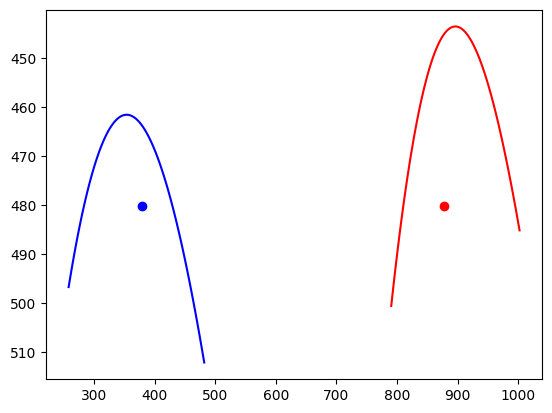

MRD1 right eye : 1.66 mm
MRD1 left eye : 3.51 mm
PHUL - MRD1 right_eye: 0.13 mm
PHUL - MRD1 left_eye: 0.09 mm
Similarity between MRD1 in both eyes :47.29 %
Similarity between PHUL - MRD1 in both eyes :144.44 %


In [6]:
upper_right_contour,upper_left_contour,right_pupil,left_pupil = read_coordinates('rotated.txt',10)
plot_contour(upper_right_contour,upper_left_contour,right_pupil,left_pupil,'r')

Equation of the right eye : 
            3            2
5.715e-06 x + 0.003518 x - 1.361 x + 304.1
Equation of the left eye: 
             3          2
-5.407e-06 x + 0.0149 x - 11.55 x + 2943


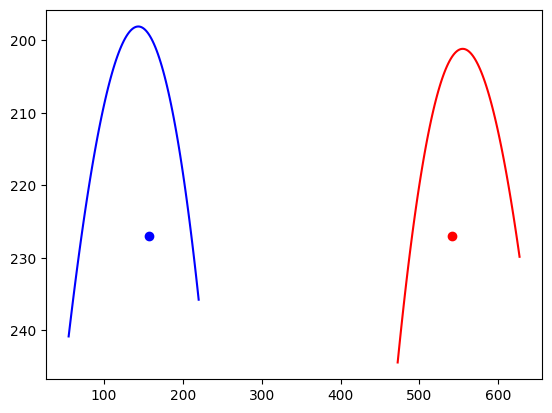

MRD1 right eye : 2.77 mm
MRD1 left eye : 2.48 mm
PHUL - MRD1 right_eye: 0.07 mm
PHUL - MRD1 left_eye: 0.07 mm
Similarity between MRD1 in both eyes :111.69 %
Similarity between PHUL - MRD1 in both eyes :100.0 %


In [7]:
upper_right_contour,upper_left_contour,right_pupil,left_pupil = read_coordinates('rotated_post.txt',11)

plot_contour(upper_right_contour,upper_left_contour,right_pupil,left_pupil,'r')